In [1]:
import pandas as pd
import names
import random
import os

In [2]:
os.getcwd()

'C:\\Users\\JAYACHANDRAN'

In [3]:
os.listdir()

['.anaconda',
 '.arduinoIDE',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.node_repl_history',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Cross_platform_analysis_for_Amazon_movie_subscribers.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'PycharmProjects',
 'Recent',
 'Salary_dataset (1).csv',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Untitled Folder',
 'Untitled Folder 1',
 'Untitled Fold

<!--  -->
Task 1: Data Cleaning and Preprocessing
Description:
Clean and preprocess the downloaded CSV dataset to ensure it is ready for analysis.
Steps:
1.	Load the Dataset:
o	Use pandas to read the CSV file into a DataFrame.
2.	Inspect the Data:
o	for any null values and handle it
3.	Save the Cleaned Data:
o	Save the cleaned dataset to a new CSV file using 


In [ ]:
from google.colab import files
import pandas as pd


uploaded = files.upload()
df = pd.read_csv( 'amazon prime movies.csv')
print("First few rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

df_cleaned = df.dropna()

df.to_csv('cleaned_amazon prime movies.csv', index=False)

Saving amazon prime movies.csv to amazon prime movies.csv
First few rows of the dataset:
     Movie Name Language IMDb Rating Running Time  Year of Release  \
0    John Rambo    Tamil           7   1 h 26 min           2008.0   
1  American Pie  English           7   1 h 35 min           1999.0   
2     Bombshell  English         6.8   1 h 48 min           2019.0   
3    Love Birds    Tamil         5.1   2 h 40 min           1996.0   
4         Hippi   Telugu           5   2 h 20 min           2019.0   

  Maturity Rating                                               Plot  
0             18+  In Thailand, John Rambo joins a group of merce...  
1             18+  You'll never look at warm apple pie the same w...  
2             18+  The provocative real story of three smart, amb...  
3             All  After accidentally meeting, Mridula (Nagma) an...  
4             18+  Hippi is about the live-in relationship betwee...  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Task 2: Exploratory Data Analysis (EDA)
Description:
Perform exploratory data analysis to understand the main characteristics of the dataset.
Steps:
1.	Load the Dataset:
2.	Univariate Analysis:
o	Analyze individual features using summary statistics and visualizations (histograms, box plots).
3.	Summarize Findings:
o	Write a report summarizing key insights and findings from the EDA
# 


Summary statistics of the dataset:
       Year of Release
count      7730.000000
mean       2006.957439
std          13.494396
min        1952.000000
25%        1999.000000
50%        2012.000000
75%        2017.000000
max        2021.000000


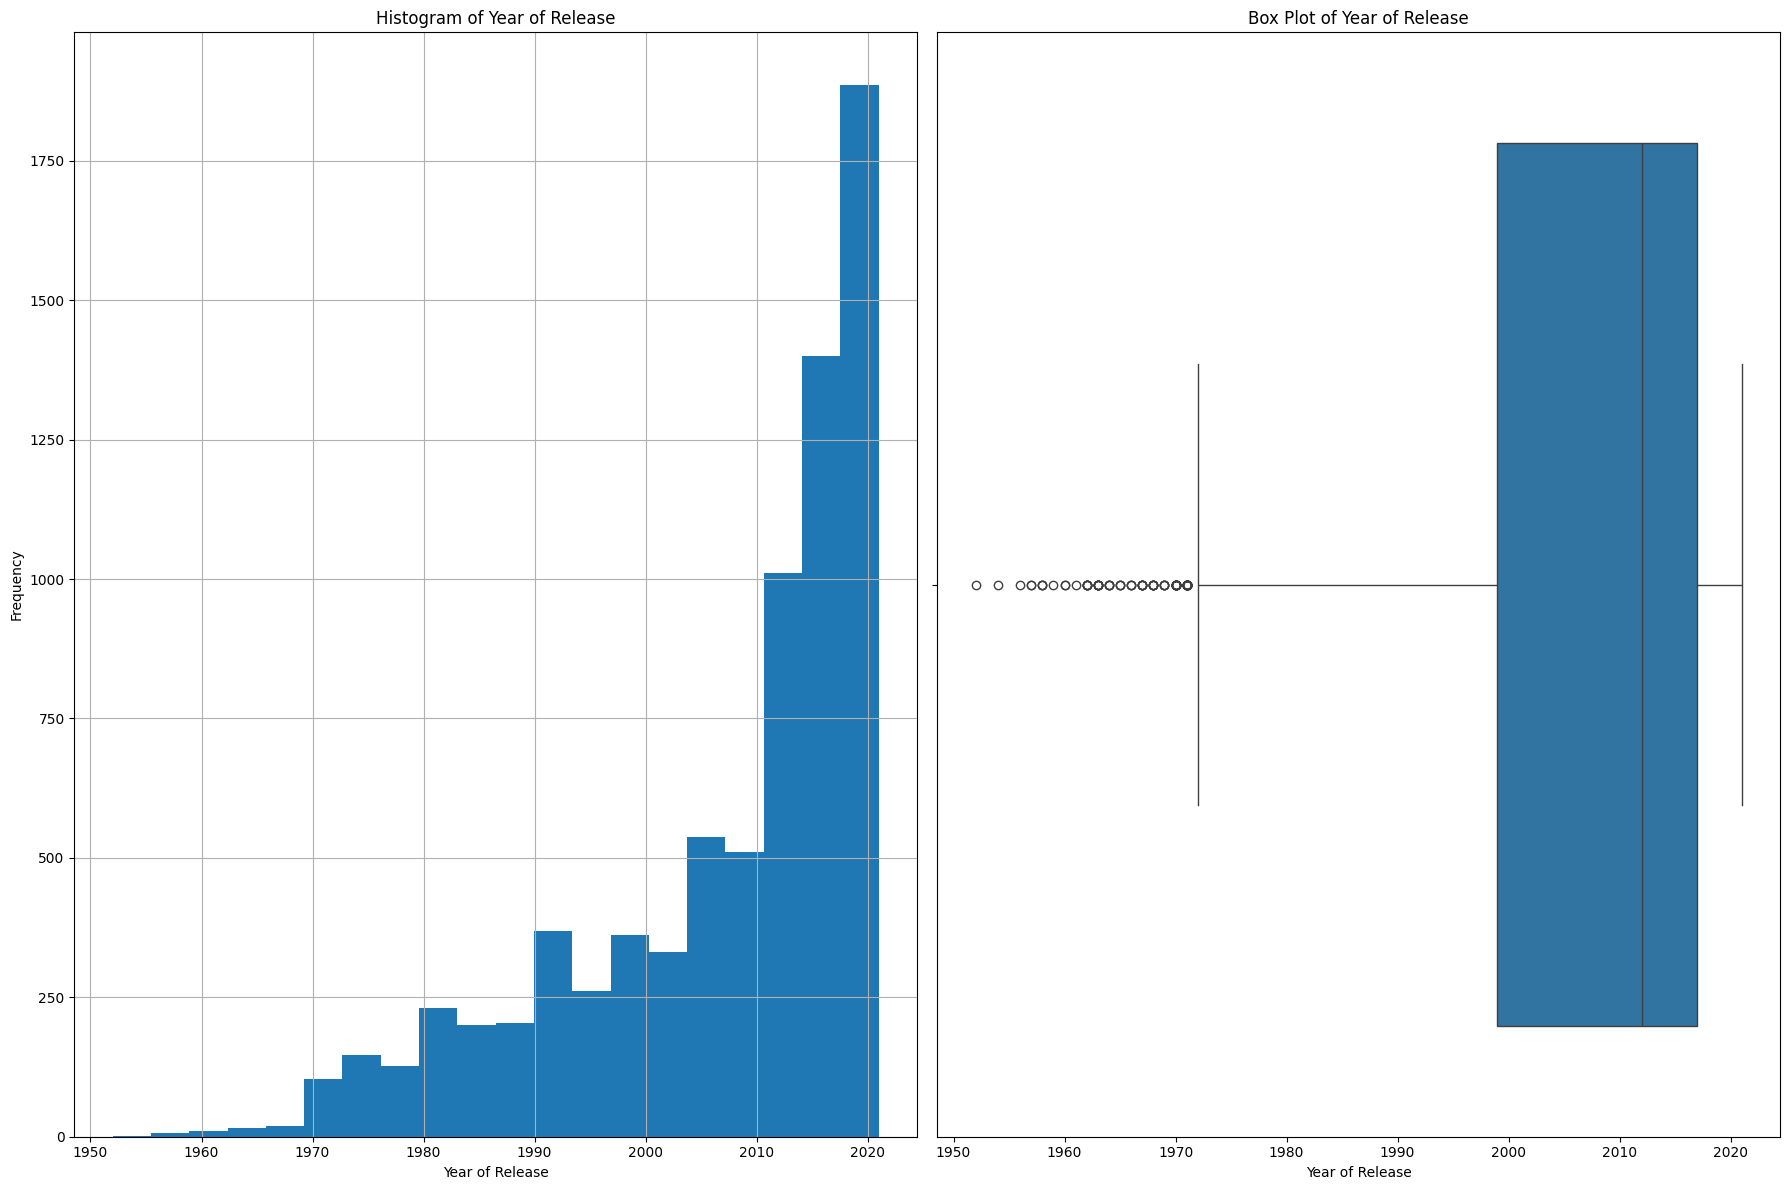

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = 'cleaned_amazon prime movies.csv'
df = pd.read_csv(file_name)

print("\nSummary statistics of the dataset:")
print(df.describe())

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_columns), 2, i*2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


Task 3: Data Pre-processing
Perform data pre-processing using NLP techniques like (TF-IDF) for reviews. 
# 

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('cleaned_amazon prime movies.csv')

print("First few rows of the dataset:")
print(df.head())

if 'IMDb Rating' not in df.columns:
    raise ValueError("The dataset does not contain an 'IMDb Rating' column.")

df['IMDb Rating'] = pd.to_numeric(df['IMDb Rating'], errors='coerce')

imdb_ratings = df['IMDb Rating'].dropna()
index_valid_ratings = imdb_ratings.index
imdb_ratings = imdb_ratings.values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_ratings = scaler.fit_transform(imdb_ratings)

scaled_ratings_series = pd.Series(scaled_ratings.flatten(), index=index_valid_ratings, name='Scaled IMDb Rating')

df = df.join(scaled_ratings_series)

output_file_path = 'tfidf_amazon prime movies.csv'
df.to_csv(output_file_path, index=False)

print("\nFirst few rows of the updated dataset with scaled IMDb ratings:")
print(df.head())

First few rows of the dataset:
     Movie Name Language IMDb Rating Running Time  Year of Release  \
0    John Rambo    Tamil           7   1 h 26 min           2008.0   
1  American Pie  English           7   1 h 35 min           1999.0   
2     Bombshell  English         6.8   1 h 48 min           2019.0   
3    Love Birds    Tamil         5.1   2 h 40 min           1996.0   
4         Hippi   Telugu           5   2 h 20 min           2019.0   

  Maturity Rating                                               Plot  
0             18+  In Thailand, John Rambo joins a group of merce...  
1             18+  You'll never look at warm apple pie the same w...  
2             18+  The provocative real story of three smart, amb...  
3             All  After accidentally meeting, Mridula (Nagma) an...  
4             18+  Hippi is about the live-in relationship betwee...  

First few rows of the updated dataset with scaled IMDb ratings:
     Movie Name Language  IMDb Rating Running Time  Year 

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357254 sha256=096d53dda89ef17d8ad3199100bf1a89add581ec24bb004683b5dff51128345a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

data_path = 'tfidf_amazon prime movies.csv'
ratings = pd.read_csv(data_path)

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['Movie Name', 'Language', 'Scaled IMDb Rating']], reader)

model = SVD()

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

trainset = data.build_full_trainset()
model.fit(trainset)

user_id = 'user_id'
item_id = 'item_id'
prediction = model.predict(user_id, item_id)
print(f'Predicted rating for user {user_id} on item {item_id}: {prediction.est}')


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    nan     nan     nan     nan     nan     nan     nan     
MAE (testset)     nan     nan     nan     nan     nan     nan     nan     
Fit time          0.11    0.11    0.12    0.12    0.18    0.13    0.03    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Predicted rating for user user_id on item item_id: 5


Task 4: Model Building
Description:
Build a recommendation model using Content based or collaborative based
# 

In [4]:
import pandas as pd

file_path = '/content/cleaned_amazon prime movies.csv'
amazon_prime_movies = pd.read_csv(file_path)

Recommended_movies = amazon_prime_movies.sort_values(by='IMDb Rating', ascending=False).head(10)

Recommended_movies.to_csv('recommended_movies.csv', index=False)

print("Recommended movies have been saved to 'recommended_movies.csv''")
print(Recommended_movies[['Movie Name', 'IMDb Rating', 'Language', 'Year of Release', 'Maturity Rating']])


Recommended movies have been saved to 'recommended_movies.csv''
                    Movie Name IMDb Rating   Language  Year of Release  \
3615               Ranganayaki         9.5    Kannada           1981.0   
3892          The Caravan Film         9.4    English           2019.0   
487                A Dark Room         9.4    English           2020.0   
4251  The Shawshank Redemption         9.3    English           1994.0   
2106           Byomkesh Bakshi         9.2    Bengali           2017.0   
2583                 Godfather         9.2  Malayalam           1991.0   
4830             The Godfather         9.2    English           1972.0   
991                  Natsamrat           9    Marathi           2015.0   
2766                       Alo           9    Bengali           2018.0   
3087           The Dark Knight           9    English           2008.0   

     Maturity Rating  
3615              NR  
3892             13+  
487              13+  
4251             18+  
2106  